In [73]:
options(repr.plot.width = 7, repr.plot.height = 4)
library("tidyverse")

In [10]:
colors = c('#9cca9e', '#ef9285', '#b983b7', '#56b6be', '#cecece')
bg = '#f0f0f0'

In [28]:
olympics <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv')

Rows: 271116 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): name, sex, team, noc, games, season, city, sport, event, medal
dbl  (5): id, age, height, weight, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [39]:
olympics |> head()
olympics |> glimpse()

id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


Rows: 271,116
Columns: 15
$ id     <dbl> 1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, …
$ name   <chr> "A Dijiang", "A Lamusi", "Gunnar Nielsen Aaby", "Edgar Lindenau…
$ sex    <chr> "M", "M", "M", "M", "F", "F", "F", "F", "F", "F", "M", "M", "M"…
$ age    <dbl> 24, 23, 24, 34, 21, 21, 25, 25, 27, 27, 31, 31, 31, 31, 33, 33,…
$ height <dbl> 180, 170, NA, NA, 185, 185, 185, 185, 185, 185, 188, 188, 188, …
$ weight <dbl> 80, 60, NA, NA, 82, 82, 82, 82, 82, 82, 75, 75, 75, 75, 75, 75,…
$ team   <chr> "China", "China", "Denmark", "Denmark/Sweden", "Netherlands", "…
$ noc    <chr> "CHN", "CHN", "DEN", "DEN", "NED", "NED", "NED", "NED", "NED", …
$ games  <chr> "1992 Summer", "2012 Summer", "1920 Summer", "1900 Summer", "19…
$ year   <dbl> 1992, 2012, 1920, 1900, 1988, 1988, 1992, 1992, 1994, 1994, 199…
$ season <chr> "Summer", "Summer", "Summer", "Summer", "Winter", "Winter", "Wi…
$ city   <chr> "Barcelona", "London", "Antwerpen", "Paris", "Calgary", "Calgar…
$ sport  <chr>

In [174]:
olympic_count = olympics |>
    mutate(date_str = glue::glue('{year}-01-01') |> str_to_lower(), date = as.Date(date_str, format = '%Y-%m-%d')) |>
    group_by(date, season) |>
    summarize(n = n()) |>
    filter(season == "Winter") |>
    arrange(n)

olympic_count |> head()

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


date,season,n
<date>,<chr>,<int>
1932-01-01,Winter,352
1924-01-01,Winter,460
1928-01-01,Winter,582
1936-01-01,Winter,895
1948-01-01,Winter,1075
1952-01-01,Winter,1088


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


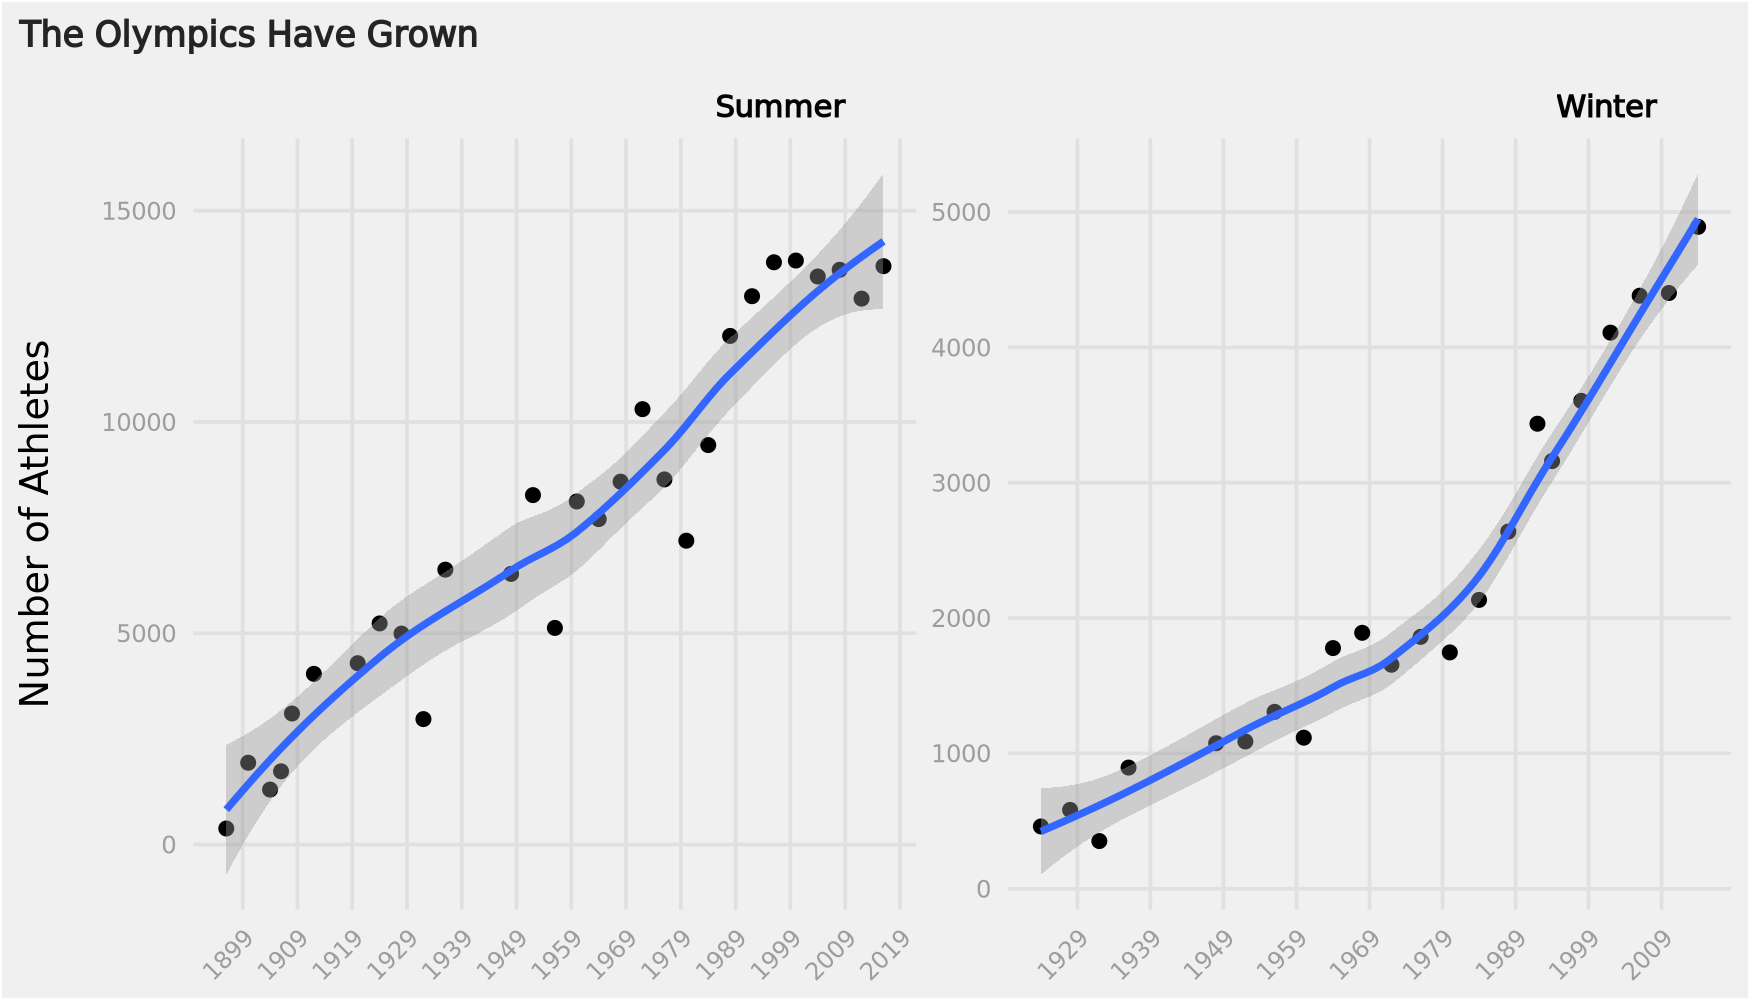

In [150]:
olympic_count |>
    ggplot(aes(x = date, y = n)) +
    geom_point() +
    geom_smooth() +
    facet_wrap(~season, scales = 'free') +
    labs(
            title = "The Olympics Have Grown",
            x = NULL,
            y = 'Number of Athletes'
        ) +
        theme(
            legend.position = 'blank',
            panel.background = element_rect(fill = bg),
            panel.grid.major = element_line(color = '#e0e0e0'),
            panel.grid.minor = element_blank(),
            plot.background = element_rect(fill = bg),
            plot.title = element_text(color = '#242424', face = 'bold', size = 10), #if you wanted to justify the text, it would have to be here
            plot.subtitle = element_text(color = '#212121', size = 8),
            plot.caption = element_text(color = '#888888', size = 7, margin = margin(t = 15, r = 0, b = 0, l = 0)),
            plot.title.position = "plot", #options here are just 'plot' vs 'panel'. It simply lines up the title or caption with the overall image or chart data
            plot.caption.position = "plot",
            legend.title = element_blank(),
            strip.background = element_blank(),
            strip.text = element_text(hjust = 0.9, color = '#020202', face = 'bold'),
            strip.placement = 'inside',
            axis.ticks = element_blank(),
            axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 7),
            axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0, unit = "pt")),
            axis.text.x = element_text(angle = 45, hjust = 1)
        ) +
        scale_x_date(breaks = "10 years", date_labels = "%Y")

In [182]:
med_age = 
olympics |> 
    filter(!is.na(medal)) |>
    group_by(season) |>
    summarize(med_age = median(age, na.rm = TRUE), max = max(age, na.rm = TRUE), min = min(age, na.rm = TRUE))

med_age

season,med_age,max,min
<chr>,<dbl>,<dbl>,<dbl>
Summer,25,73,10
Winter,26,58,13


Warning message:
“Removed 732 rows containing non-finite outside the scale range (`stat_bin()`).”


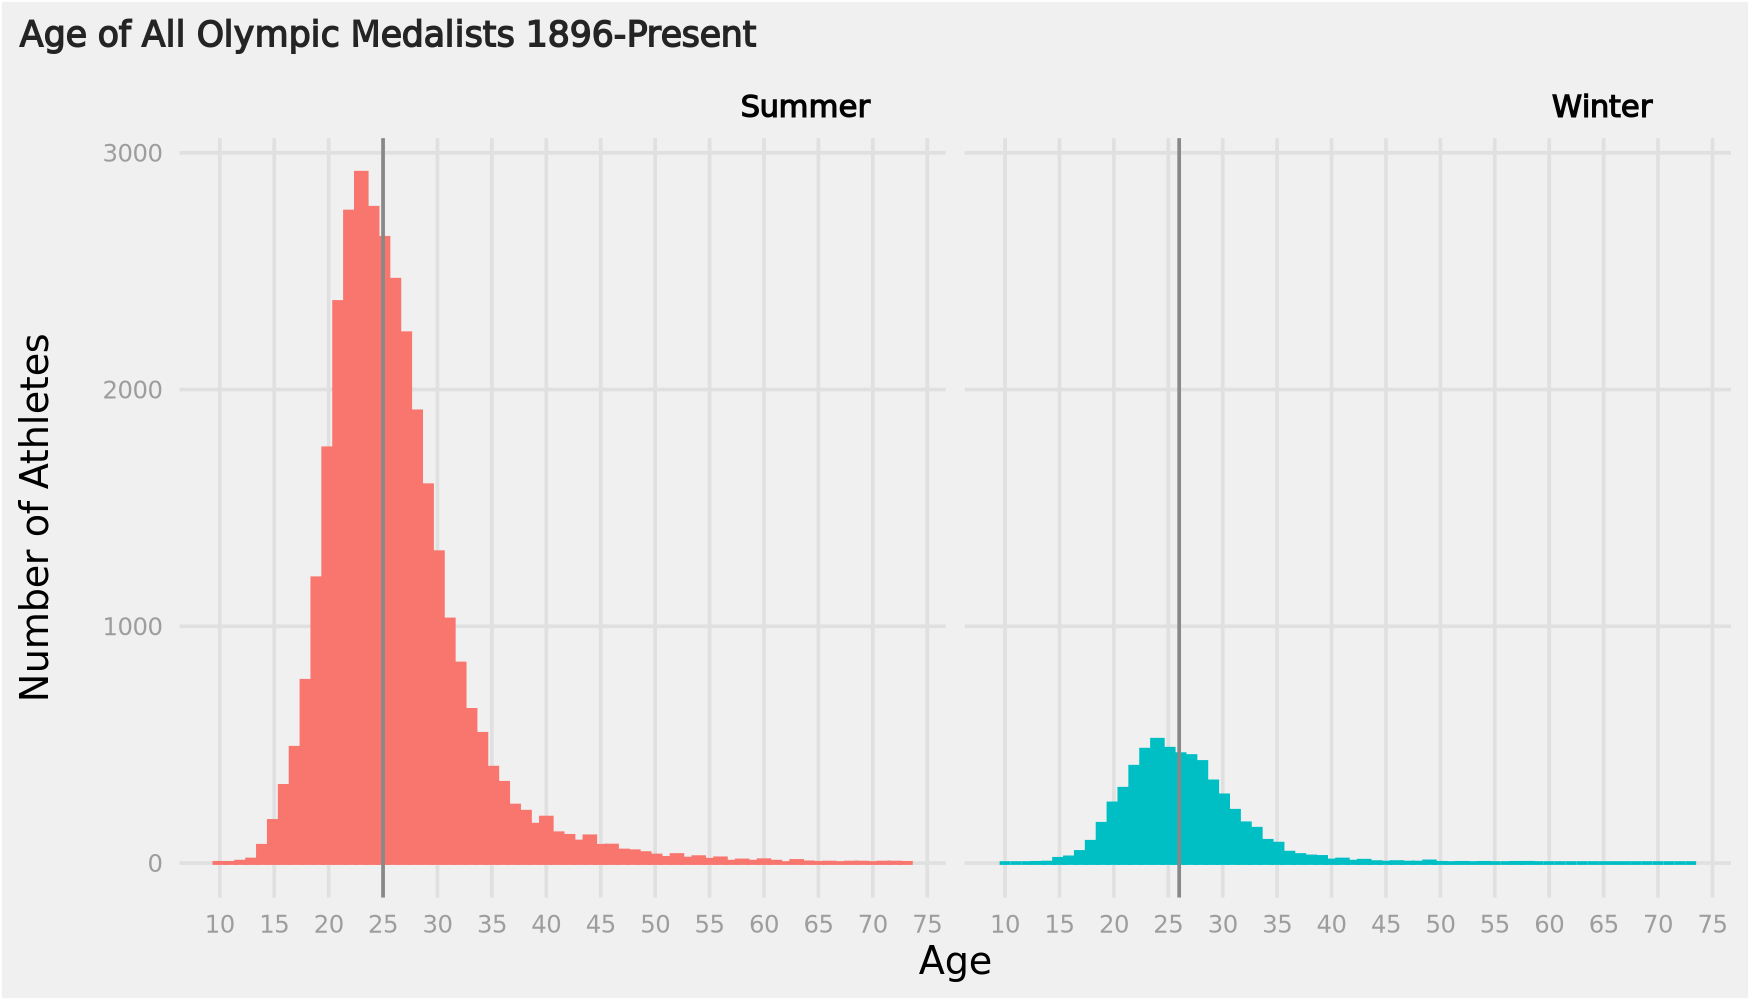

In [183]:
olympics |>
    filter(!is.na(medal)) |>
    ggplot(aes(x = age, color = season, fill = season)) + 
        geom_histogram(binwidth = 1) + 
        facet_wrap(~season) +
        geom_vline(data = med_age, aes(xintercept = med_age), color = '#888888') +
        labs(
            title = "Ages of All Olympic Medalists 1896-Present",
            x = 'Age',
            y = 'Number of Athletes'
        ) +
        theme(
            legend.position = 'blank',
            panel.background = element_rect(fill = bg),
            panel.grid.major = element_line(color = '#e0e0e0'),
            panel.grid.minor = element_blank(),
            plot.background = element_rect(fill = bg),
            plot.title = element_text(color = '#242424', face = 'bold', size = 10), #if you wanted to justify the text, it would have to be here
            plot.subtitle = element_text(color = '#212121', size = 8),
            plot.caption = element_text(color = '#888888', size = 7, margin = margin(t = 15, r = 0, b = 0, l = 0)),
            plot.title.position = "plot", #options here are just 'plot' vs 'panel'. It simply lines up the title or caption with the overall image or chart data
            plot.caption.position = "plot",
            legend.title = element_blank(),
            strip.background = element_blank(),
            strip.text = element_text(hjust = 0.9, color = '#020202', face = 'bold'),
            strip.placement = 'inside',
            axis.ticks = element_blank(),
            axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 7),
            axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0, unit = "pt"))
        ) +
        scale_x_continuous(n.breaks = 20)

In [187]:
olympics_age = 
    olympics |>
    filter(!is.na(medal), year > 1896) |>
    group_by(season, year) |>
    summarize(over35 = sum(age >= 35, na.rm = TRUE) / n())

olympics_age |>
    head()

olympics |>
    filter(!is.na(medal)) |>
    arrange(desc(age)) |>
    head()

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


season,year,over35
<chr>,<dbl>,<dbl>
Summer,1900,0.14238411
Summer,1904,0.10905350
Summer,1906,0.09170306
Summer,1908,0.15042118
Summer,1912,0.14558980
Summer,1920,0.23088685


id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
22984,John (Herbert Crawford-) Copley (Williamson-),M,73,NA,NA,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver
30731,Jozu Dupon,M,72,NA,NA,Belgium,BEL,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Medals",Bronze
117046,Oscar Gomer Swahn,M,72,NA,NA,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver
75648,Charles William Martin,M,71,NA,NA,Crabe II-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Silver
75648,Charles William Martin,M,71,NA,NA,Crabe II-4,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Bronze
45286,Letitia Marion Hamilton,F,69,NA,NA,Ireland,IRL,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",Bronze


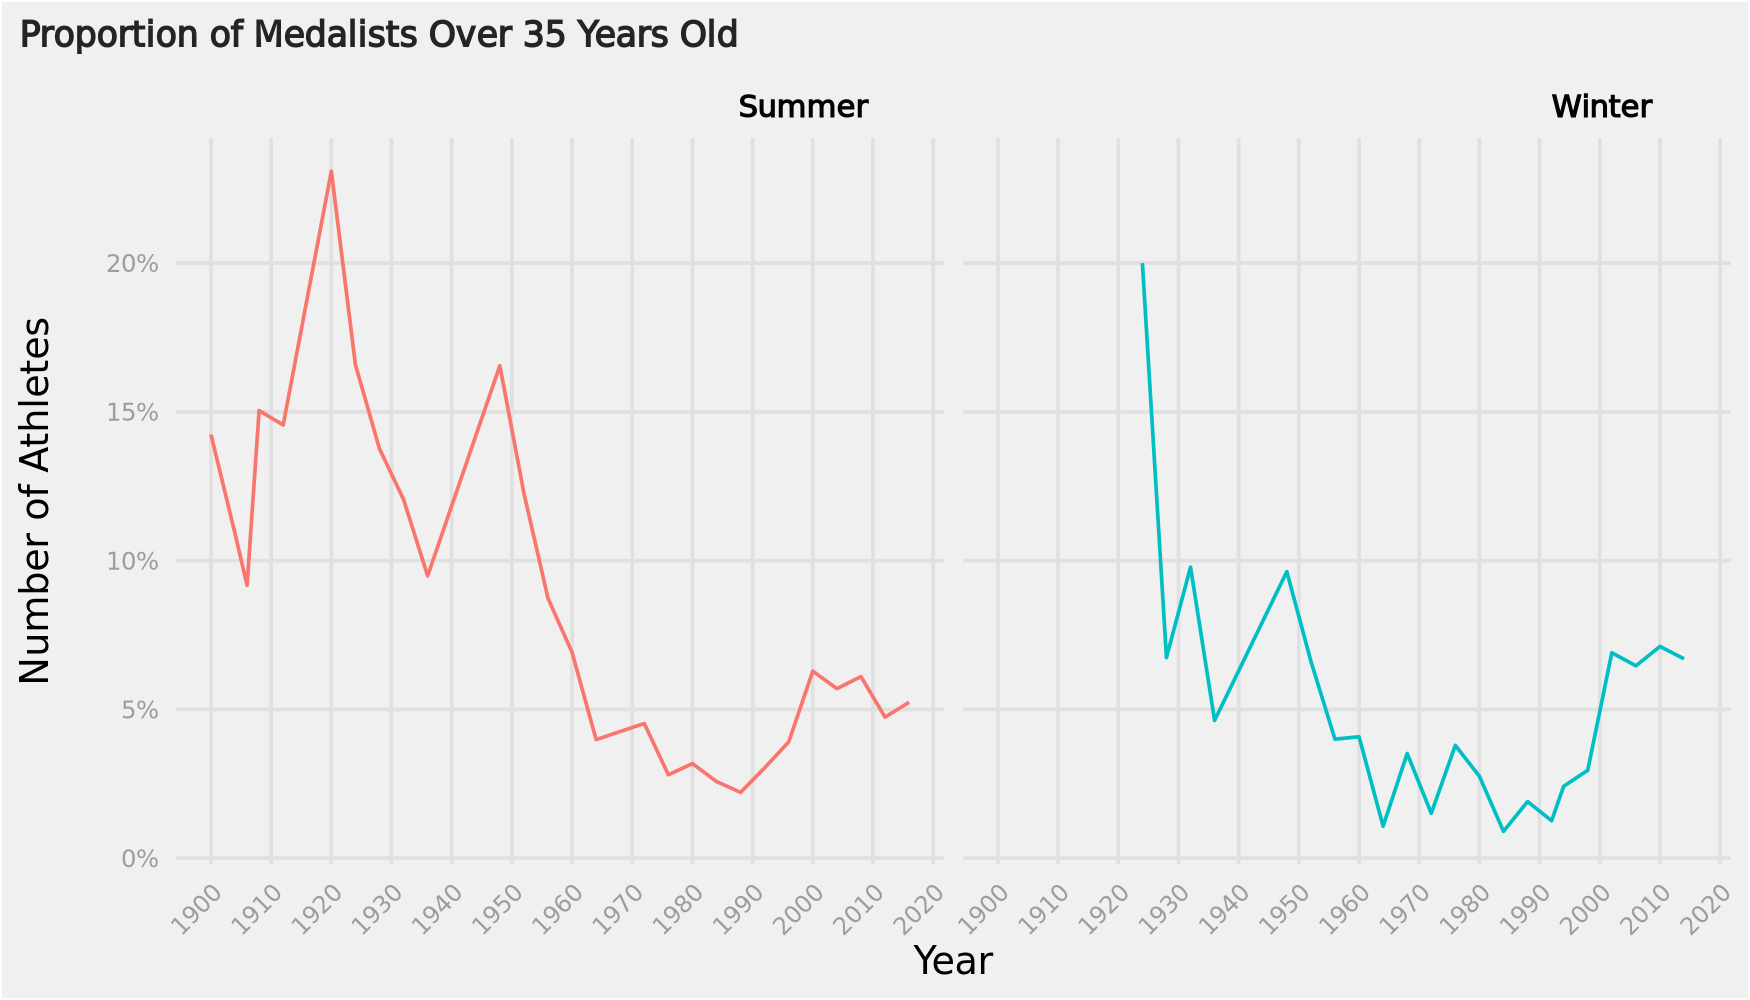

In [175]:
olympics_age |>
    ggplot(aes(x = year, y = over35, color = season, fill = season)) + 
        geom_line() + 
        facet_wrap(~season) +
        labs(
            title = "Proportion of Olympic Medalists Over 35 Years Old",
            x = 'Year',
            y = 'Number of Athletes'
        ) +
        theme(
            legend.position = 'blank',
            panel.background = element_rect(fill = bg),
            panel.grid.major = element_line(color = '#e0e0e0'),
            panel.grid.minor = element_blank(),
            plot.background = element_rect(fill = bg),
            plot.title = element_text(color = '#242424', face = 'bold', size = 10), #if you wanted to justify the text, it would have to be here
            plot.subtitle = element_text(color = '#212121', size = 8),
            plot.caption = element_text(color = '#888888', size = 7, margin = margin(t = 15, r = 0, b = 0, l = 0)),
            plot.title.position = "plot", #options here are just 'plot' vs 'panel'. It simply lines up the title or caption with the overall image or chart data
            plot.caption.position = "plot",
            legend.title = element_blank(),
            strip.background = element_blank(),
            strip.text = element_text(hjust = 0.9, color = '#020202', face = 'bold'),
            strip.placement = 'inside',
            axis.ticks = element_blank(),
            axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 7),
            axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0, unit = "pt")),
            axis.text.x = element_text(angle = 45, hjust = 1)
        ) +
        scale_x_continuous(n.breaks = 10) +
        scale_y_continuous(labels = scales::label_percent()) 

The Olympics have grown. Since the modern summer olympics began in 1896, the number of athletes has increased from just 380 (Athens 1896) to nearly 14000 in recent decades. The winter olympics have similarly grown from a low of 352 (Lake Placid 1932) to nearly 5000 (Sochi 2014). This growth in athletes corresponds to an increase in the number of sports and number of events, as well as the number of participating countries. 

Throughout the decades, the distribution of olympic medalists by age has followed a bell curve, with a median age of 25 for summer olympic sports and a median age of 26 for winter olympic sports. Medals winners have been as old as 73, and as young as 10. Many of the oldest medalists have been in Art Competitions that were present before 1948. Older athletes (over 35 years old) seem to have peaked in their performance in the 1920s. More than 20% of medals in the Antwerp 1920 Summer Olympics were won by athletes over 35. The performance of older athletes reached a nadir in the late 80s in both the Summer and Winter olympics, but has bounced back in the past 20 to 30 years. The proportion of older medalists has been stable around 5% in the summer olympics since Sydney 2000, and around 7% in the winter olympics since Salt Lake City 2002.